Occasionally, our go-to measures for model accuracy can be misleading.

This typically occurs when our model fitting overly-generalizes to whatever data it was trained on, and the way we split out train/test sets don't do a very good job of exposing the oversight.

## Sample Model

Before we get started, let's make our work reproducible.

In [1]:
import numpy as np
np.random.seed(0)

Now let's build a model

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

We're going to deliberately make a lopsided balance between how much of our data is training and how much is test.

In [3]:
X, y = make_regression(n_informative=10, n_features=20, n_samples=1000,
                      noise=2)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.01)
[arr.shape for arr in train_test_split(X, y, test_size=.01)]

[(990, 20), (10, 20), (990,), (10,)]

And build a Decision Tree on top of it

In [4]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

In [5]:
model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## Evaluating the Model

And if we revisit the Root Mean Squared Error as our measure of model accuracy, we see that this is perhaps a respectable level of error.

In [6]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_y, model.predict(test_X))
rmse = np.sqrt(mse)
rmse

169.49551234959384

However if you recall, this is a high-variance dataset and we trained our model on 99% of the data, and only tested 1%.

The characteristics of that 1% of holdout could be dramatically different from the rest of the population. So what we want to do instead is repeat that test/train splitting process across *multiple* samples of data within our dataset.

We do this with Cross Validation, which splits the dataset up into `n` sets, then trains on `n-1` of them, testing against the holdout, ultimately returning each accuracy score.

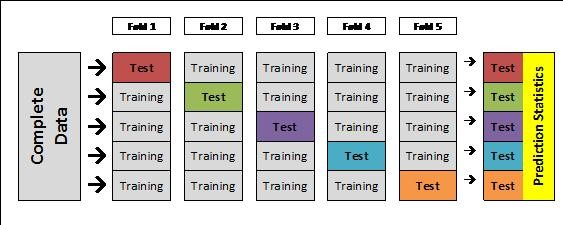

In [7]:
from IPython.display import Image
Image('images/crossval.jpg')

In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(# what model we use
                         model,
                         # data we'll feed it
                         test_X,
                         test_y, 
                         # how we score each split
                         scoring='neg_mean_squared_error',
                         # how many cuts to make
                         cv=10)

accuracies = np.sqrt(-scores)
accuracies

array([671.37508873,  23.24207653, 325.06050807, 546.89507962,
       325.06050807, 422.75560985, 145.45726901, 590.8301919 ,
       239.22220502, 422.75560985])

As we can see, there's a good amount of variation depending on which slice of data we were testing against.

In [9]:
accuracies.std()

191.8951604429332

Therefore, we'll average out all of the cross-validation scores

In [10]:
accuracies.mean()

371.2654146645147

Revealing that we understated our error in estimation by nearly a factor of two!